# Exercise 1: Applying the Project Template

## Classification: The Breast Cancer dataset
    
The objective of the exercise is to apply the project template from lecture 6 on scikit-learn breast cancer dataset.

## Contents:

1. [Prepare Project](#1.-Prepare-Project)
2. [Define Problem](#2.-Define-Problem)
3. [Exploratory Analysis](#3.-Exploratory-Analysis)
    - [The dimensions of the dataset](#The-dimensions-of-the-dataset)
    - [A peek at the data](#A-peek-at-the-data)
    - [Statistical summary of all attributes](#Statistical-summary-of-all-attributes)
    - [The class distribution (number of instances per class)](#The-class-distribution-(number-of-instances-per-class))
    - [Univariate plots to better understand each attribute](#Univariate-plots-to-better-understand-each-attribute)
    - [Multivariate plots to better understand relationships between attributes](#Multivariate-plots-to-better-understand-relationships-between-attributes)    
4. [Prepare Data](#4.-Prepare-Data)
5. [Evaluate Algorithms](#5.-Evaluate-Algorithms)
    - [Apply a set of algorithms and select the best model](#Apply-a-set-of-algorithms-and-select-the-best-model)   
6. [Improve Accuracy](#6.-Improve-Accuracy)
7. [Finalise Model](#7.-Finalise-Model)
    - [Split the dataset into training/test sets (with test set being the 20% of the dataset) or use cross-validation and evaluate accuracy, as well as other metrics of the winning algorithm](#Split-the-dataset-into-training/test-sets-(with-test-set-being-the-20%-of-the-dataset)-or-use-cross-validation-and-evaluate-accuracy,-as-well-as-other-metrics-of-the-winning-algorithm)
    - [Report the confusion matrix](#Report-the-confusion-matrix)

## 1. Prepare Project

1. Load libraries
2. Load dataset

In [ ]:
# Importing warnings module to filter out FutureWarnings
from warnings import simplefilter

# Ignore FutureWarnings to enhance code readability
simplefilter(action='ignore', category=FutureWarning)

# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# Set display precision for better readability of data
pd.set_option('display.precision', 3)

# Modify the default figure size to accommodate larger plots
plt.rcParams["figure.figsize"] = [22.0, 20.0]

# Import necessary modules for feature scaling
from sklearn.preprocessing import StandardScaler

# Import modules for model validation and evaluation
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

# Import a set of machine learning algorithms for comparison
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Specify a random seed for reproducibility
seed = 7

# Load the Breast Cancer dataset from scikit-learn
from sklearn.datasets import load_breast_cancer

# Convert the dataset to a pandas DataFrame
data = load_breast_cancer(as_frame=True)
df = data.frame

## 2. Define Problem

*What is our task?*

Develop a machine learning model to classify breast cancer instances as either malignant or benign based on features provided in the scikit-learn breast cancer dataset.

*What is our goal?*

We aim to create a robust machine learning model capable of accurately classifying breast cancer instances. Therefore, the metric we will use to compare our models and choose the best one will be that of accuracy, since this is a medical application and accuracy is of great interest to us.

*What is our roadmap?*

The process begins with **data loading** and **exploration**, where the structure, features, and target variable of the dataset are examined. Any missing values are addressed in the subsequent data preparation step, involving the **data cleaning**, the **feature selection**, the separation of features and the target variable, as well as **standardization** or **normalization**, if necessary. The model selection phase involves **choosing a set of appropriate classification algorithms** such as Logistic Regression, Naive Bayes and Decision Trees. Multiple models are implemented in order to assess their performance. Once the model is selected, it undergoes **training on the training set**, with the option for **hyperparameter tuning** to optimize performance. Model evaluation is also an important step, where metrics like **accuracy**, **precision**, **recall** and **F1 score**, and visualization tools, like **confusion matrix**, are employed for the evaluation of the model's performance. Finally, the trained model is saved in a PKL file for future use.

## 3. Exploratory Analysis

Firstly, let's try to understand **the contents and the structure of the dataset** by reading its description and printing the names of the features and target classes.

*Full dataset description:*

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

*Feature Names:*

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

*Target Names:*

Τhe target variable indicates whether the mass is malignant (1) or benign (0).

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

### The dimensions of the dataset

- What is the shape of our data?


In [ ]:
df.shape
# (rows, columns)

(569, 31)

- How many features do we have?

In [ ]:
len(data.feature_names)

30

- How many observations do we have?

In [ ]:
df.shape[0]

569

### A peek at the data

The first 5 rows of the dataset:

In [ ]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0            0.118   
1        20.57         17.77          132.90     1326.0            0.085   
2        19.69         21.25          130.00     1203.0            0.110   
3        11.42         20.38           77.58      386.1            0.142   
4        20.29         14.34          135.10     1297.0            0.100   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.278           0.300                0.147          0.242   
1             0.079           0.087                0.070          0.181   
2             0.160           0.197                0.128          0.207   
3             0.284           0.241                0.105          0.260   
4             0.133           0.198                0.104          0.181   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.079  ...          17.33           184.60      2019.0   
1                   0.057  ...          23.41           158.80      1956.0   
2                   0.060  ...          25.53           152.50      1709.0   
3                   0.097  ...          26.50            98.87       567.7   
4                   0.059  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0             0.162              0.666            0.712                 0.265   
1             0.124              0.187            0.242                 0.186   
2             0.144              0.424            0.450                 0.243   
3             0.210              0.866            0.687                 0.258   
4             0.137              0.205            0.400                 0.163   

   worst symmetry  worst fractal dimension  target  
0           0.460                    0.119       0  
1           0.275                    0.089       0  
2           0.361                    0.088       0  
3           0.664                    0.173       0  
4           0.236                    0.077       0  

[5 rows x 31 columns]

The last 5 rows of the dataset:

In [ ]:
df.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0            0.111   
565        20.13         28.25          131.20     1261.0            0.098   
566        16.60         28.08          108.30      858.1            0.085   
567        20.60         29.33          140.10     1265.0            0.118   
568         7.76         24.54           47.92      181.0            0.053   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564             0.116           0.244                0.139          0.173   
565             0.103           0.144                0.098          0.175   
566             0.102           0.093                0.053          0.159   
567             0.277           0.351                0.152          0.240   
568             0.044           0.000                0.000          0.159   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                   0.056  ...          26.40           166.10      2027.0   
565                   0.055  ...          38.25           155.00      1731.0   
566                   0.056  ...          34.12           126.70      1124.0   
567                   0.070  ...          39.42           184.60      1821.0   
568                   0.059  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564             0.141              0.211            0.411   
565             0.117              0.192            0.322   
566             0.114              0.309            0.340   
567             0.165              0.868            0.939   
568             0.090              0.064            0.000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                 0.222           0.206                    0.071       0  
565                 0.163           0.257                    0.066       0  
566                 0.142           0.222                    0.078       0  
567                 0.265           0.409                    0.124       0  
568                 0.000           0.287                    0.070       1  

[5 rows x 31 columns]

Data Type of Each Attribute:

In [ ]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

### Statistical summary of all attributes

In [ ]:
df.describe()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
count      569.000       569.000         569.000    569.000          569.000   
mean        14.127        19.290          91.969    654.889            0.096   
std          3.524         4.301          24.299    351.914            0.014   
min          6.981         9.710          43.790    143.500            0.053   
25%         11.700        16.170          75.170    420.300            0.086   
50%         13.370        18.840          86.240    551.100            0.096   
75%         15.780        21.800         104.100    782.700            0.105   
max         28.110        39.280         188.500   2501.000            0.163   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count           569.000         569.000              569.000        569.000   
mean              0.104           0.089                0.049          0.181   
std               0.053           0.080                0.039          0.027   
min               0.019           0.000                0.000          0.106   
25%               0.065           0.030                0.020          0.162   
50%               0.093           0.062                0.034          0.179   
75%               0.130           0.131                0.074          0.196   
max               0.345           0.427                0.201          0.304   

       mean fractal dimension  ...  worst texture  worst perimeter  \
count                 569.000  ...        569.000          569.000   
mean                    0.063  ...         25.677          107.261   
std                     0.007  ...          6.146           33.603   
min                     0.050  ...         12.020           50.410   
25%                     0.058  ...         21.080           84.110   
50%                     0.062  ...         25.410           97.660   
75%                     0.066  ...         29.720          125.400   
max                     0.097  ...         49.540          251.200   

       worst area  worst smoothness  worst compactness  worst concavity  \
count     569.000           569.000            569.000          569.000   
mean      880.583             0.132              0.254            0.272   
std       569.357             0.023              0.157            0.209   
min       185.200             0.071              0.027            0.000   
25%       515.300             0.117              0.147            0.115   
50%       686.500             0.131              0.212            0.227   
75%      1084.000             0.146              0.339            0.383   
max      4254.000             0.223              1.058            1.252   

       worst concave points  worst symmetry  worst fractal dimension   target  
count               569.000         569.000                  569.000  569.000  
mean                  0.115           0.290                    0.084    0.627  
std                   0.066           0.062                    0.018    0.484  
min                   0.000           0.157                    0.055    0.000  
25%                   0.065           0.250                    0.071    0.000  
50%                   0.100           0.282                    0.080    1.000  
75%                   0.161           0.318                    0.092    1.000  
max                   0.291           0.664                    0.207    1.000  

[8 rows x 31 columns]

### The class distribution (number of instances per class)

**Comment:** We have 212 instances of benign (0) and 357 of  malignant (1) tumors. So, the dataset has balanced class distribution.

In [ ]:
df.groupby('target').size()

target
0    212
1    357
dtype: int64

*Skew of Univariate Distributions*

In [ ]:
df.skew()

mean radius                0.942
mean texture               0.650
mean perimeter             0.991
mean area                  1.646
mean smoothness            0.456
mean compactness           1.190
mean concavity             1.401
mean concave points        1.171
mean symmetry              0.726
mean fractal dimension     1.304
radius error               3.089
texture error              1.646
perimeter error            3.444
area error                 5.447
smoothness error           2.314
compactness error          1.902
concavity error            5.110
concave points error       1.445
symmetry error             2.195
fractal dimension error    3.924
worst radius               1.103
worst texture              0.498
worst perimeter            1.128
worst area                 1.859
worst smoothness           0.415
worst compactness          1.474
worst concavity            1.150
worst concave points       0.493
worst symmetry             1.434
worst fractal dimension    1.663
target    

*Correlation between attributes*

In [ ]:
correlations = df.corr(method='pearson')
correlations

mean radius  mean texture  mean perimeter  mean area  \
mean radius                    1.000         0.324           0.998      0.987   
mean texture                   0.324         1.000           0.330      0.321   
mean perimeter                 0.998         0.330           1.000      0.987   
mean area                      0.987         0.321           0.987      1.000   
mean smoothness                0.171        -0.023           0.207      0.177   
mean compactness               0.506         0.237           0.557      0.499   
mean concavity                 0.677         0.302           0.716      0.686   
mean concave points            0.823         0.293           0.851      0.823   
mean symmetry                  0.148         0.071           0.183      0.151   
mean fractal dimension        -0.312        -0.076          -0.261     -0.283   
radius error                   0.679         0.276           0.692      0.733   
texture error                 -0.097         0.386          -0.087     -0.066   
perimeter error                0.674         0.282           0.693      0.727   
area error                     0.736         0.260           0.745      0.800   
smoothness error              -0.223         0.007          -0.203     -0.167   
compactness error              0.206         0.192           0.251      0.213   
concavity error                0.194         0.143           0.228      0.208   
concave points error           0.376         0.164           0.407      0.372   
symmetry error                -0.104         0.009          -0.082     -0.072   
fractal dimension error       -0.043         0.054          -0.006     -0.020   
worst radius                   0.970         0.353           0.969      0.963   
worst texture                  0.297         0.912           0.303      0.287   
worst perimeter                0.965         0.358           0.970      0.959   
worst area                     0.941         0.344           0.942      0.959   
worst smoothness               0.120         0.078           0.151      0.124   
worst compactness              0.413         0.278           0.456      0.390   
worst concavity                0.527         0.301           0.564      0.513   
worst concave points           0.744         0.295           0.771      0.722   
worst symmetry                 0.164         0.105           0.189      0.144   
worst fractal dimension        0.007         0.119           0.051      0.004   
target                        -0.730        -0.415          -0.743     -0.709   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                        0.171             0.506           0.677   
mean texture                      -0.023             0.237           0.302   
mean perimeter                     0.207             0.557           0.716   
mean area                          0.177             0.499           0.686   
mean smoothness                    1.000             0.659           0.522   
mean compactness                   0.659             1.000           0.883   
mean concavity                     0.522             0.883           1.000   
mean concave points                0.554             0.831           0.921   
mean symmetry                      0.558             0.603           0.501   
mean fractal dimension             0.585             0.565           0.337   
radius error                       0.301             0.497           0.632   
texture error                      0.068             0.046           0.076   
perimeter error                    0.296             0.549           0.660   
area error                         0.247             0.456           0.617   
smoothness error                   0.332             0.135           0.099   
compactness error                  0.319             0.739           0.670   
concavity error                    0.248             0.571           0.691   
concave points error        

### Univariate plots to better understand each attribute

*Histograms to summarize the distributions of the features:*

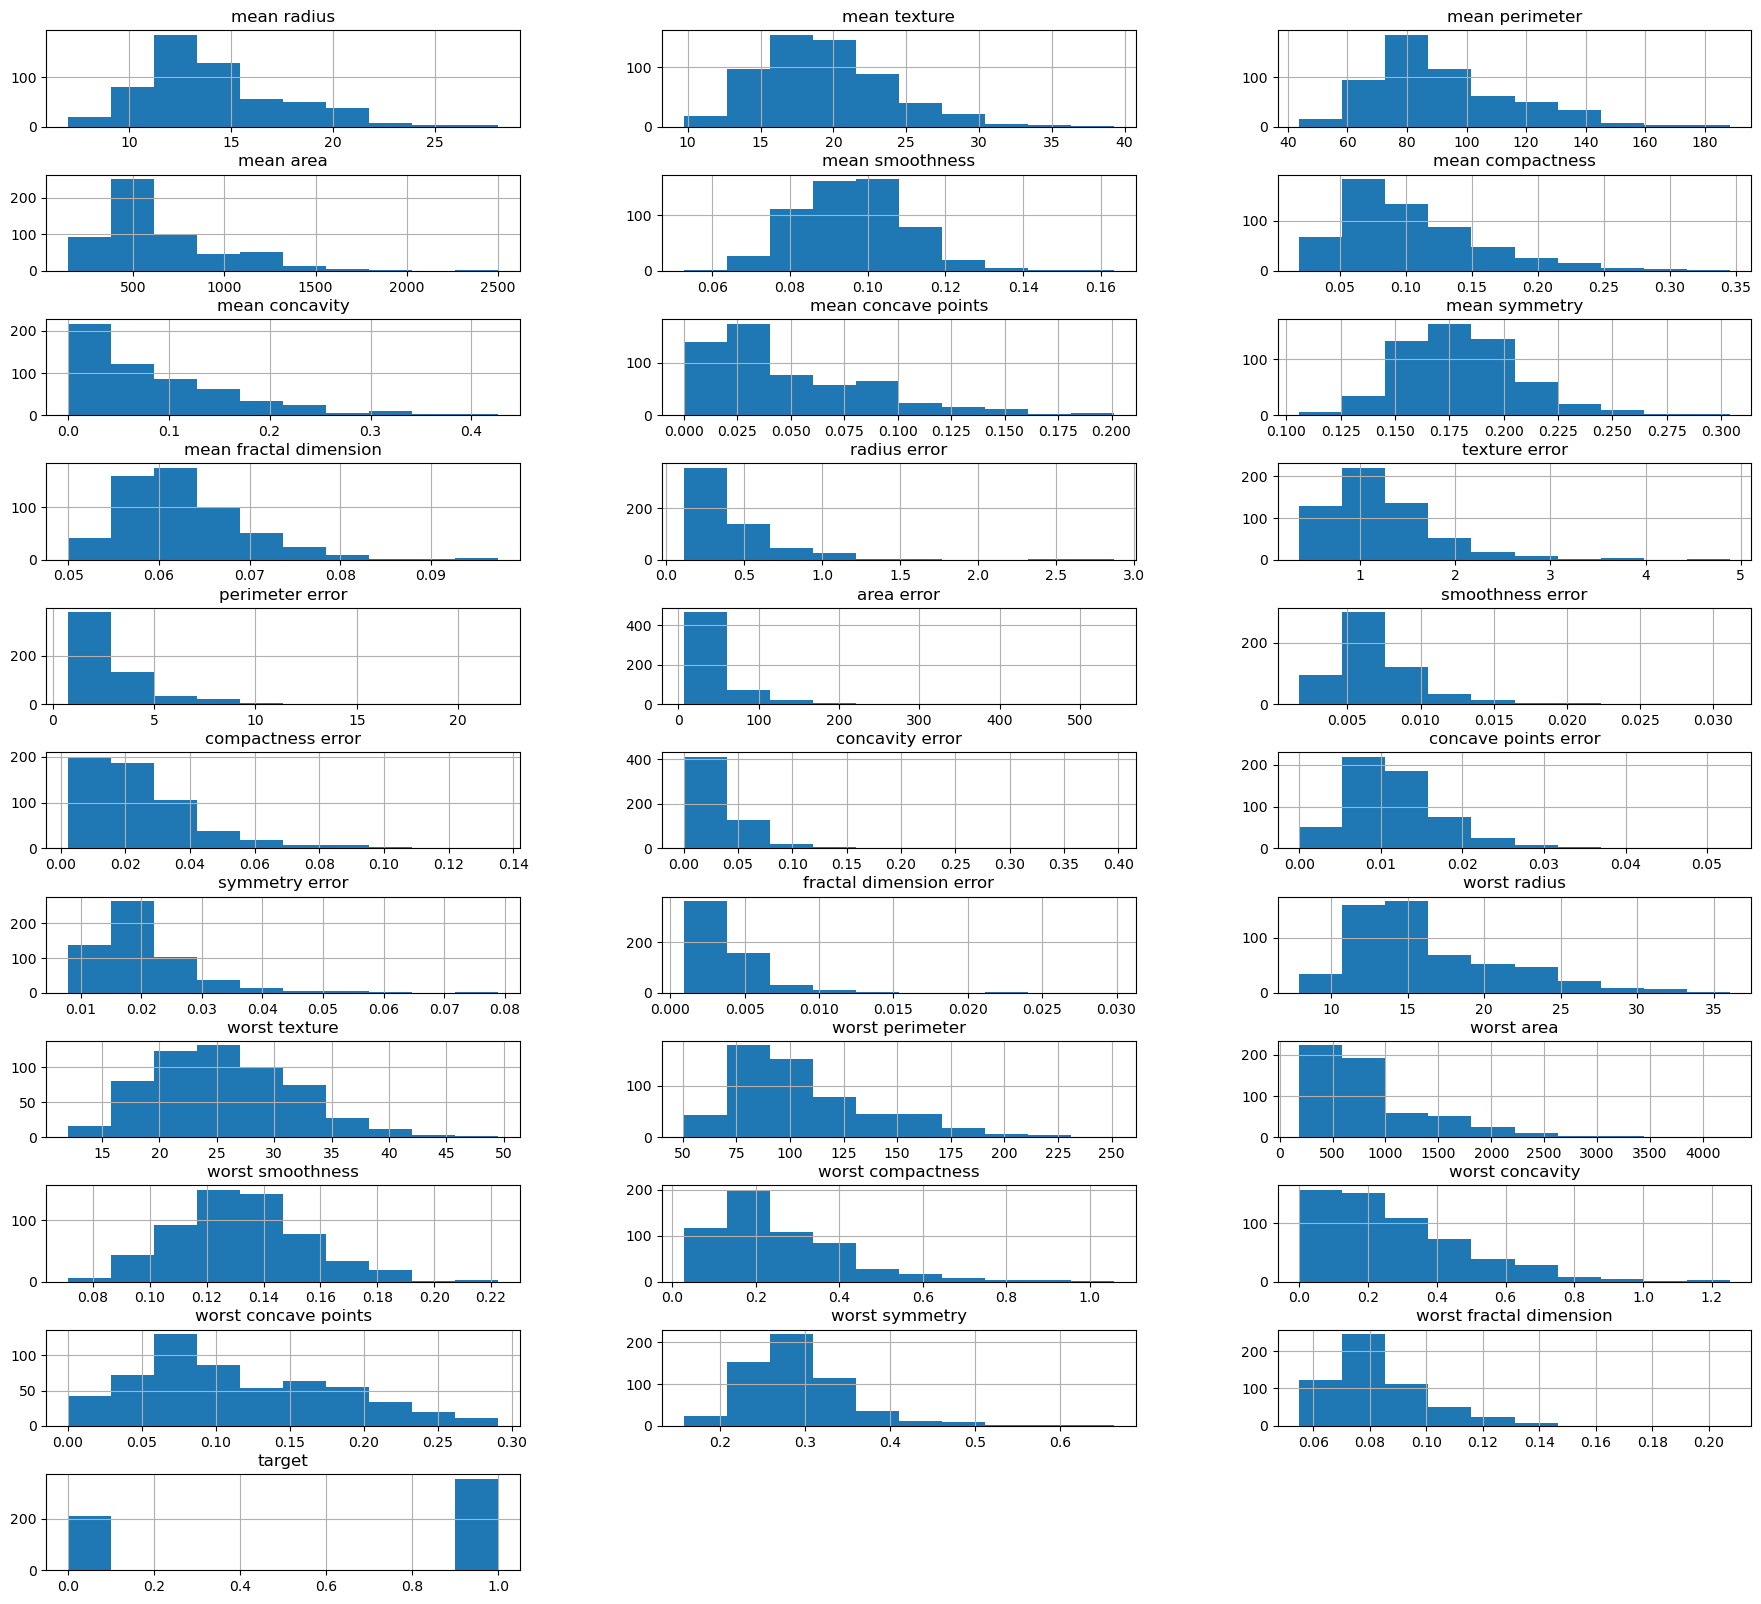

In [ ]:
h = df.hist(layout=(11,3))
plt.subplots_adjust(hspace=0.5)
plt.show()

*Density Plots:*

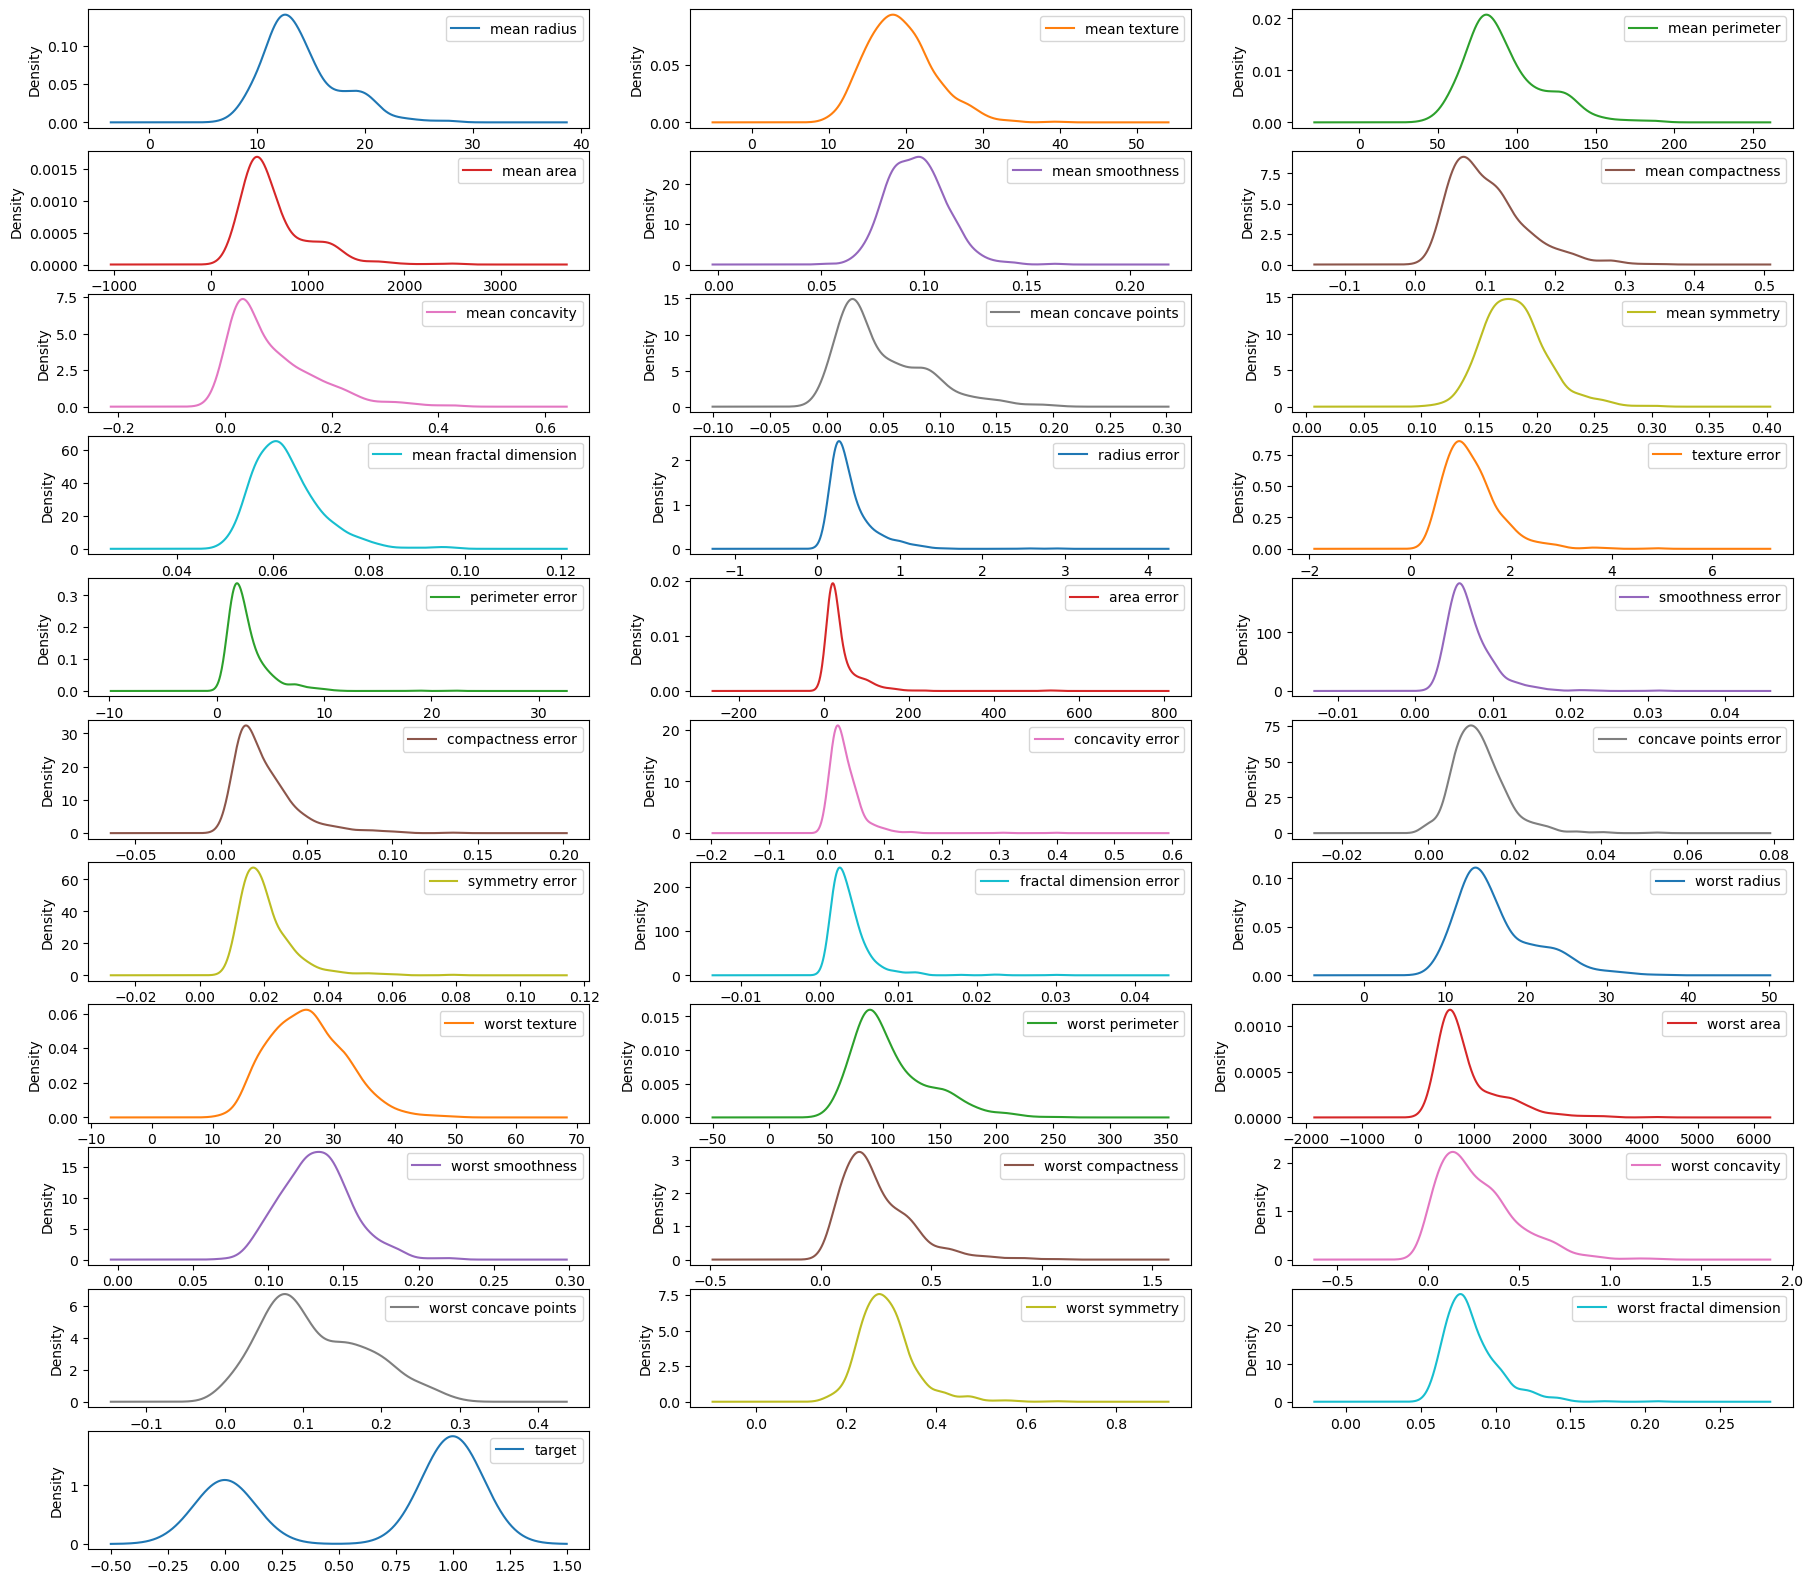

In [ ]:
df.plot(kind='density', subplots=True, layout=(11,3), sharex=False)
plt.show()

*Box plots:*

**Comment:** We notice large differences in the scale of the features and a significant number of outliers. These observations will be useful for making decisions about the data transforms.

<AxesSubplot:>

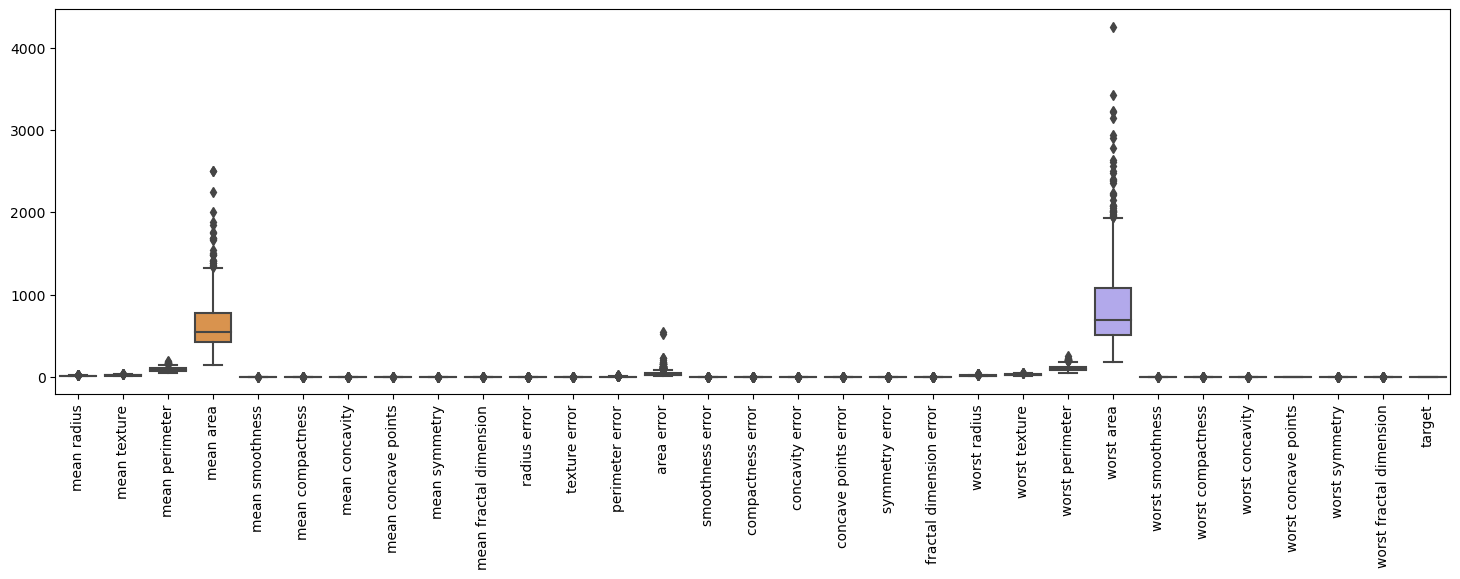

In [ ]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sns.boxplot(data=df)

*Box plots after removing columns with high variance:*

<AxesSubplot:>

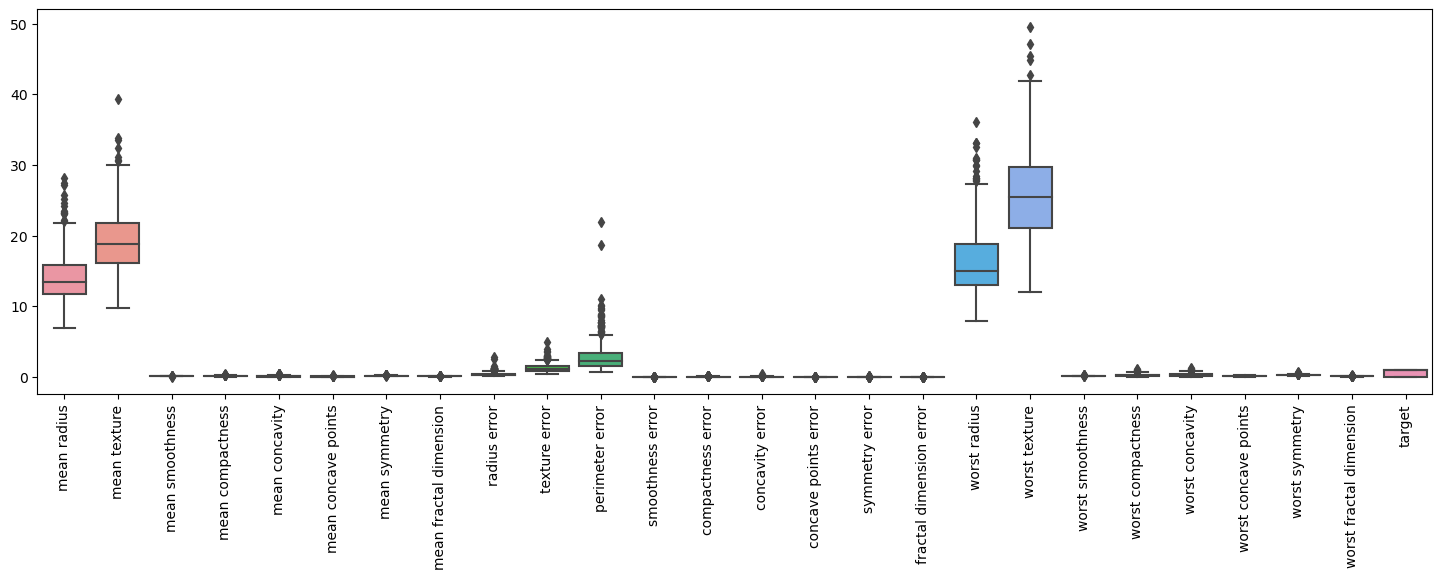

In [ ]:
stats_df = df.drop(['mean perimeter','mean area', 'area error', 'worst perimeter', 'worst area'], axis=1)
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sns.boxplot(data=stats_df)

### Multivariate plots to better understand relationships between attributes

**Comment:** Based on the heatmap below large correlations between certain features are observed. Therefore, feature selection would be a beneficial step.

*Correlation Matrix:*

<AxesSubplot:>

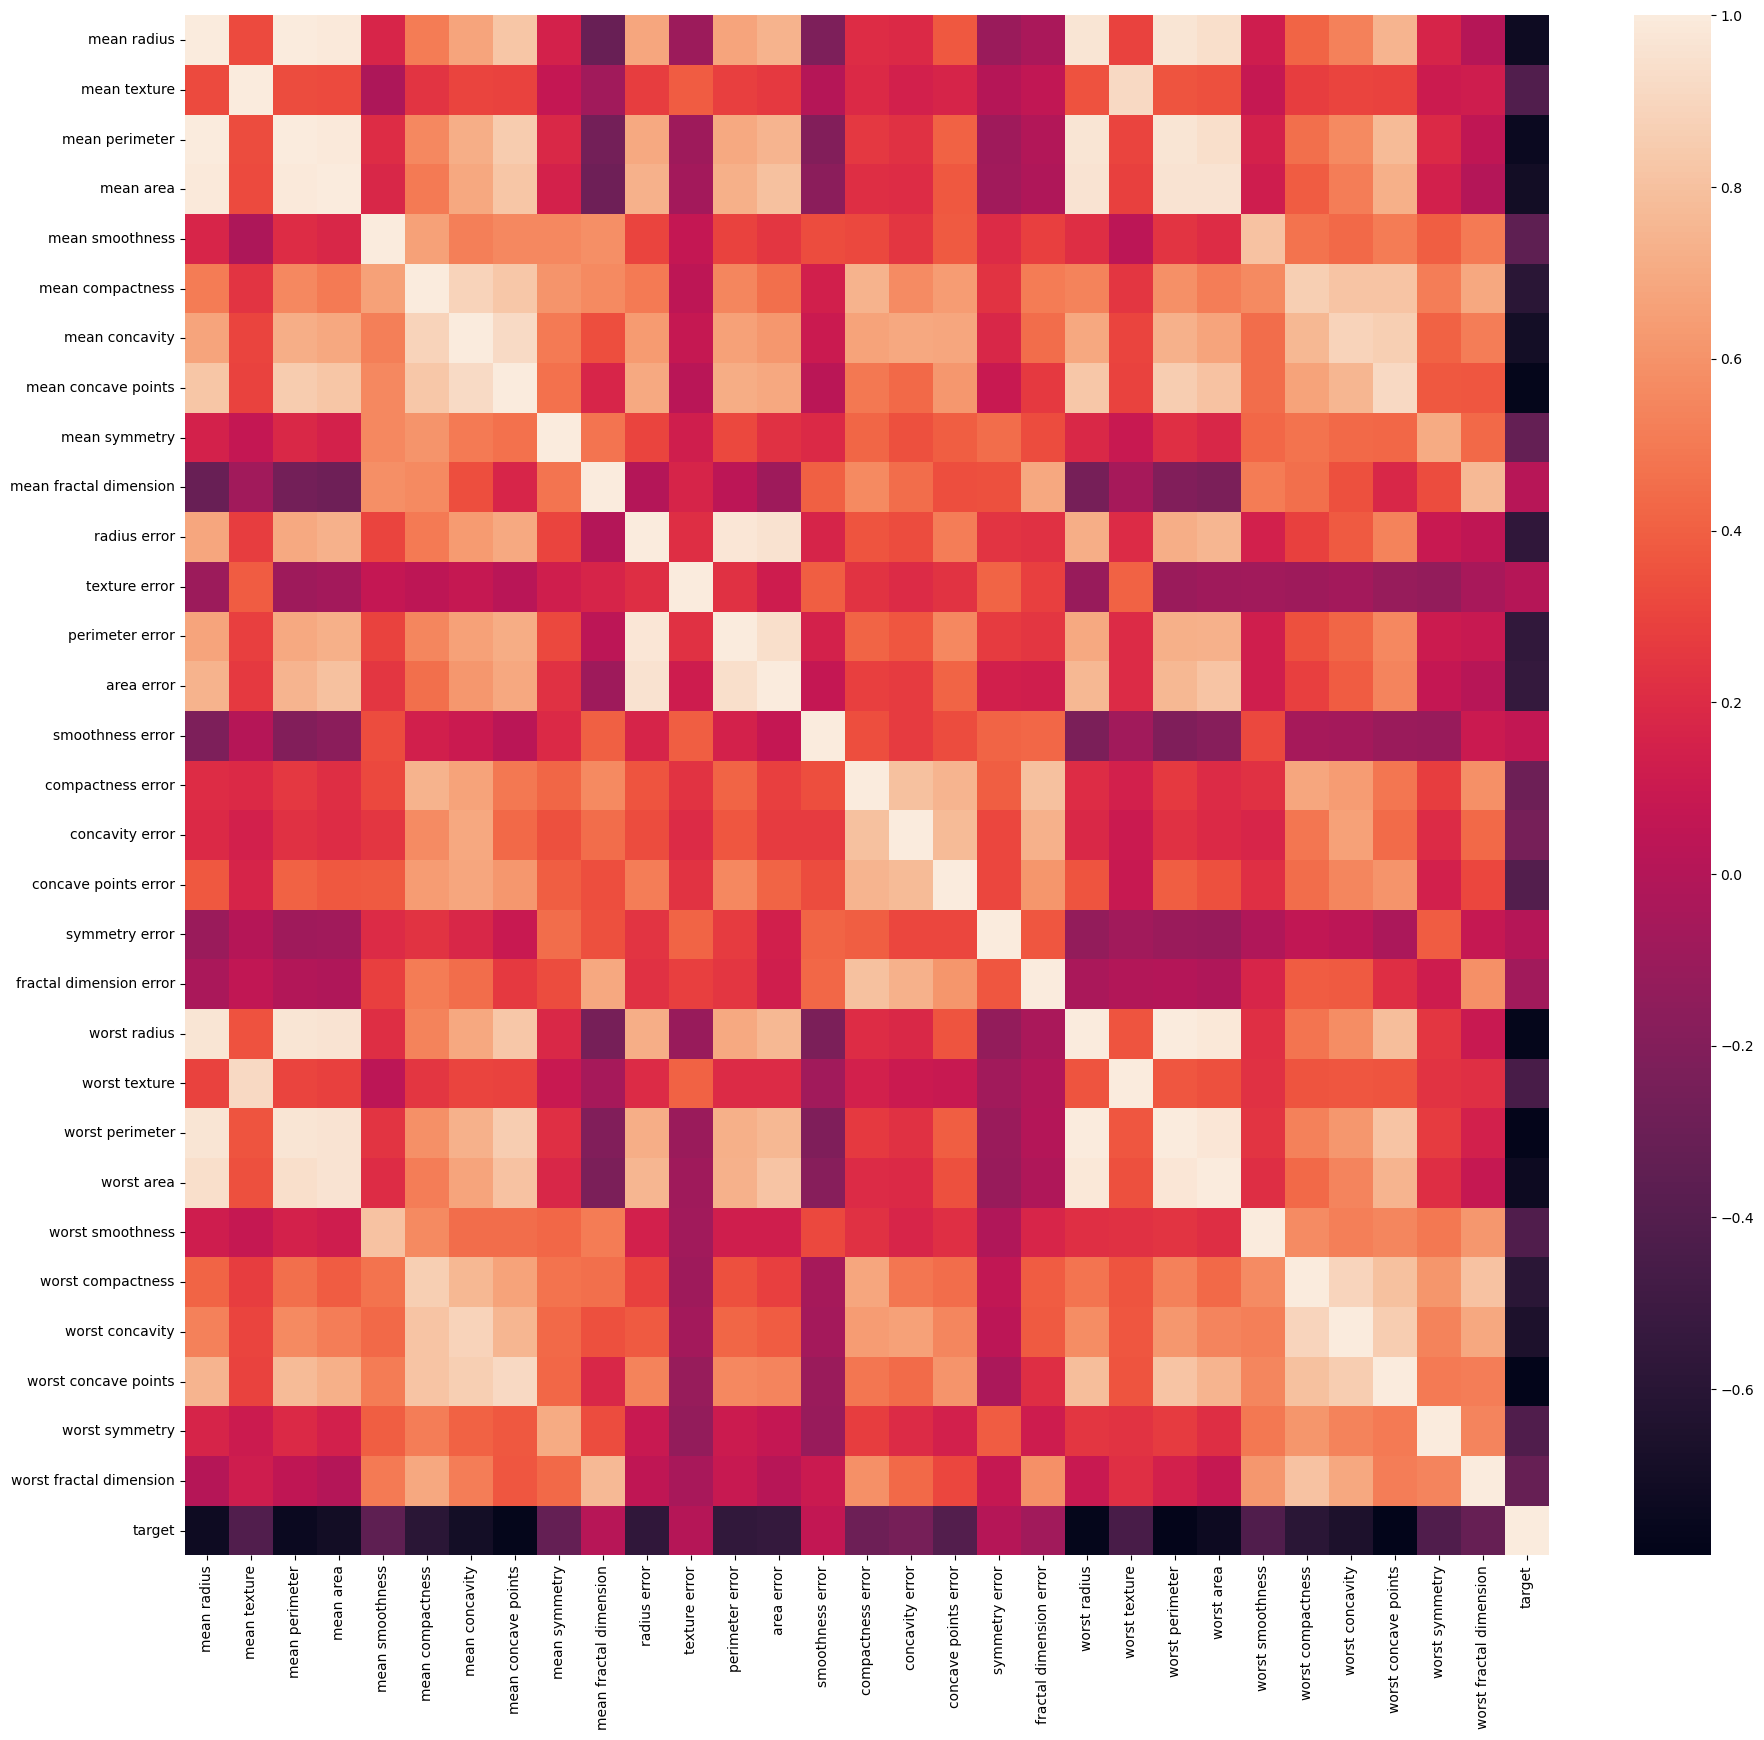

In [ ]:
sns.heatmap(correlations)

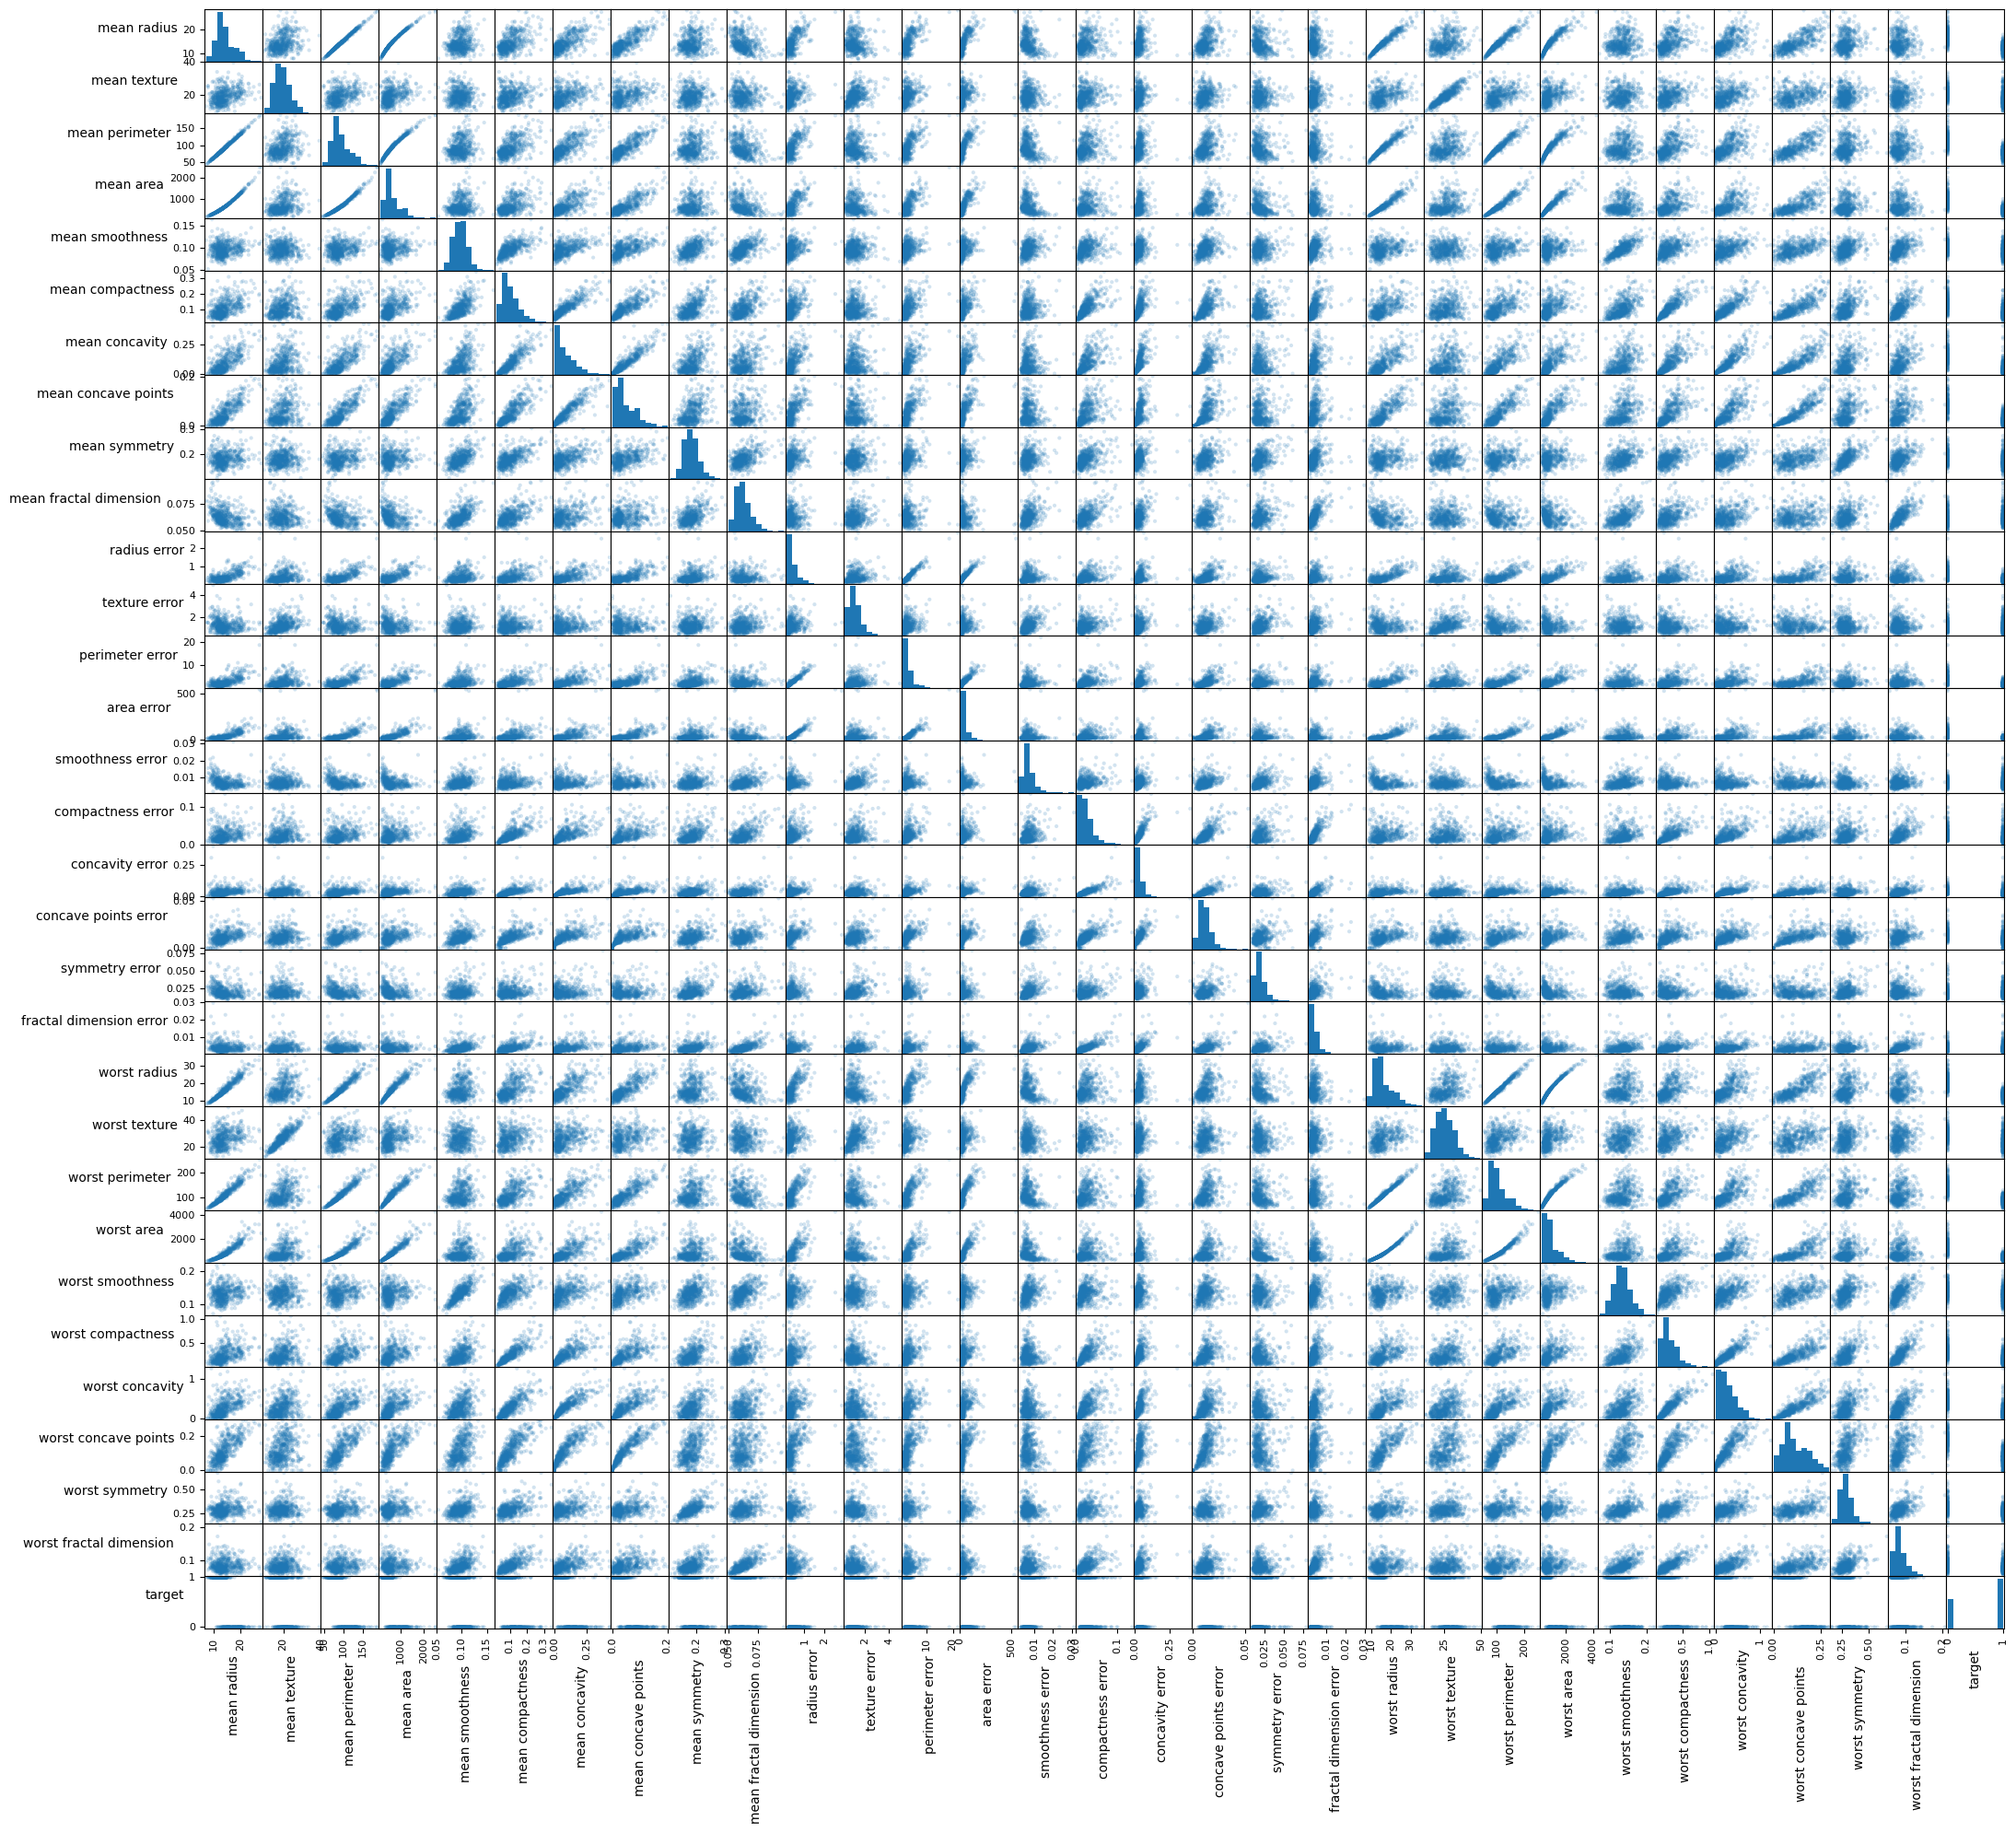

In [ ]:
# 'alpha=0.2' sets transparency for data points
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

# Rotate x-axis labels by 90 degrees for better readability
# Rotate y-axis labels by 0 degrees (default) and align them to the right
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Adjust subplots to have zero spacing between them
plt.gcf().subplots_adjust(wspace=0, hspace=0)

plt.show()

## 4. Prepare Data

- Data Cleaning

According to the dataset description (Missing Attribute Values: None) and the results of the descriptive statistics above (where the count is consistently 569 for all attributes), we can infer that the dataset is free of any missing values. Also, we have decided not to remove potential outliers, due to the absence of domain-specific knowledge.


- Feature Selection

1. Univariate feature reduction (remove low correlations with the target)

In [ ]:
# Calculate the absolute correlation of features with the target variable
cor_target = abs(correlations["target"])

# Select features with low correlation (less than 0.1) with the target variable
irrelevant_features = cor_target[cor_target < 0.1]

# Convert the names of irrelevant features to a list
features_to_be_removed = irrelevant_features.keys().tolist()
irrelevant_features

mean fractal dimension     0.013
texture error              0.008
smoothness error           0.067
symmetry error             0.007
fractal dimension error    0.078
Name: target, dtype: float64

2. Feature reduction based on collinearity (for each highly correlated pair of features, leave only the feature that correlates better with the target value).

In [ ]:
def high_cor_function(df):
    """
    Identify and display pairs of highly correlated features in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing features.

    Returns:
    - pd.Series: Series containing pairs of highly correlated features.
    """

    print('Pairs of highly correlated features:')
    cor = abs(df.corr())
    # Transpose the DataFrame and calculate correlation coefficients
    corrm = np.corrcoef(df.transpose())
    # Subtract diagonal values to get only off-diagonal correlations
    corr = corrm - np.diagflat(corrm.diagonal())
    # Stack and sort correlations in descending order
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    # Filter out self-correlations (correlation with itself)
    high_cor = c1[c1.values!=1]
    thresh = 0.97
     # Display pairs of highly correlated features above the threshold
    display(high_cor[high_cor>thresh])

    return high_cor[high_cor>thresh]


high_cor = high_cor_function(df)
for indx, values in high_cor.items():
    if indx[0] != 'target' and indx[1] != 'target':
        # Check if either feature in the pair is in features_to_be_removed
        if indx[0] not in features_to_be_removed and indx[1] not in features_to_be_removed:
            # Choose the feature with lower correlation with the target value to be removed
            if cor_target[indx[0]] < cor_target[indx[1]]:
                features_to_be_removed.append(indx[0])
            else:
                features_to_be_removed.append(indx[1])

print('Features to be removed: ', features_to_be_removed)

Pairs of highly correlated features:


mean perimeter   mean radius        0.998
worst radius     worst perimeter    0.994
mean area        mean radius        0.987
                 mean perimeter     0.987
worst radius     worst area         0.984
worst perimeter  worst area         0.978
perimeter error  radius error       0.973
mean perimeter   worst perimeter    0.970
dtype: float64

Features to be removed:  ['mean fractal dimension', 'texture error', 'smoothness error', 'symmetry error', 'fractal dimension error', 'mean radius', 'worst radius', 'mean area', 'worst area', 'perimeter error', 'mean perimeter']


**Comment:** Now we notice in the heatmap below an absence of highly correlated features, while the remaining features are significantly related to the target.

<AxesSubplot:>

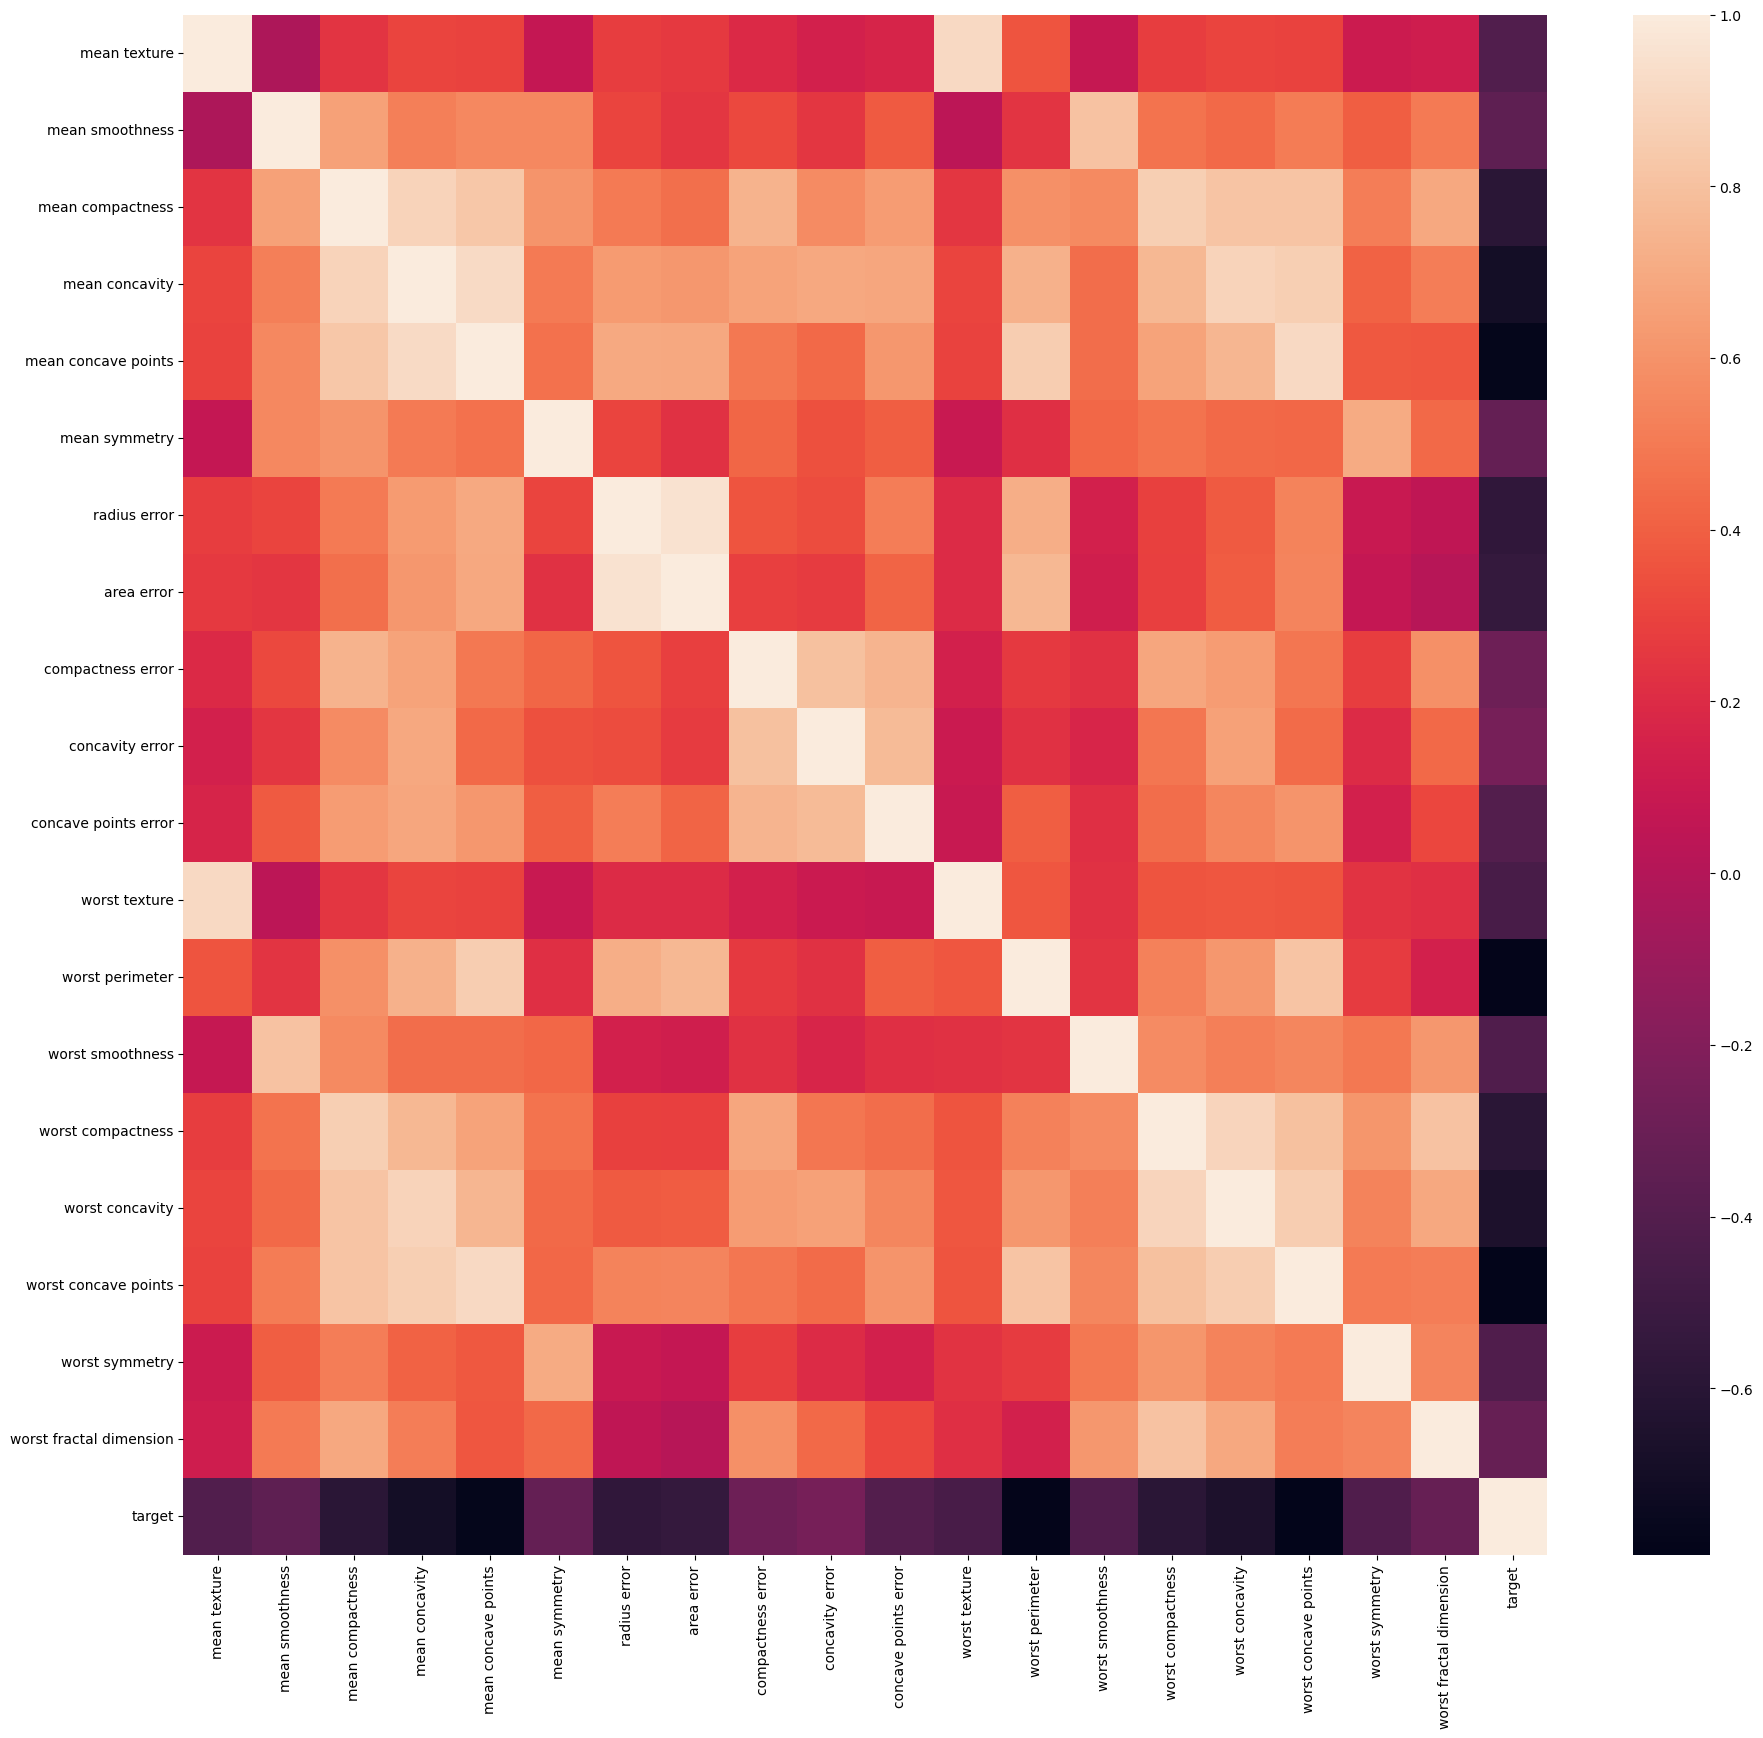

In [ ]:
# Create a new DataFrame by dropping the features to be removed and visualize the new correlations between features
new_df = df.drop(features_to_be_removed, axis=1)
new_correlations = new_df.corr(method='pearson')
sns.heatmap(new_correlations)

- Data Wrangling

Studying the univariate plots above we noticed that we have several outliers. Therefore, we decided to standardize the data instead of normalize, as normalization is sensitive to outliers.

In [ ]:
array = new_df.values
X = array[:,0:-1]
# Use StandardScaler to fit and transform the feature columns for standardization
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
Y = array[:,-1]

## 5. Evaluate Algorithms

We compare the set of classification algorithms that have been chosen based on the accuracy of their predictions using the cross-validation method.

**Comment:** The LogisticRegression emerged as the best algorithm, as it has the higher mean accuracy in the different experiments and the lowest standard deviation.

### Apply a set of algorithms and select the best model

In [ ]:
def compare_algorithms(models, scoring, X, Y):
    """
    Compare the performance of machine learning algorithms using cross-validation.

    Parameters:
    - models (list): List of tuples containing (name, model) pairs.
    - scoring (str): The scoring metric for evaluation.
    - X (array-like): Feature matrix.
    - Y (array-like): Target variable.

    Returns:
    - int: Index of the algorithm with the highest mean cross-validation score.
    """
    results = [] # List to store cross-validation results
    names   = [] # List to store algorithm names

    # Iterate over each algorithm and evaluate its performance
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print("%03s: %f (± %f)" % (name, cv_results.mean(), cv_results.std()))

    # Visualize the distribution of results
    plt.figure(figsize=(10,5))
    plt.boxplot(results)
    plt.xticks(list(range(1,len(names)+1)), names)
    plt.show()

    # Identify the index of the algorithm with the highest mean cross-validation score
    index_of_max = np.argmax(np.mean(results, axis=1))

    return index_of_max

 LR: 0.975376 (± 0.011695)
LDA: 0.945520 (± 0.018309)
kNN: 0.956078 (± 0.022512)
 DT: 0.929699 (± 0.030389)
 NB: 0.922650 (± 0.028567)


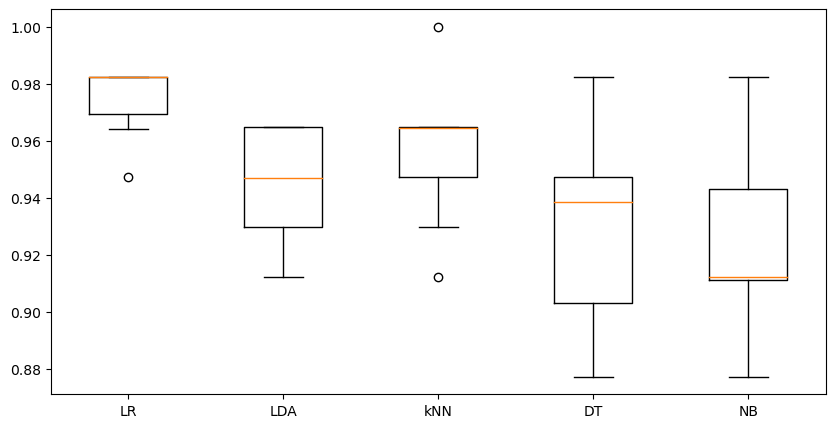

----- The best model is  LR! -----


In [ ]:
# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',  LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))

# The scoring function to use
scoring = 'accuracy'

best_model = compare_algorithms(models, scoring, rescaledX, Y)

print('----- The best model is %03s! -----'% (models[best_model][0]))

## 6. Improve Accuracy

Improve performance by hyperparameter optimisation.

**Comment:** Since LogisticRegression emerged as the best model, we attempted the following optimization.

*Grid Search Parameter Tuning:*

In [ ]:
# Check if the best model is Logistic Regression ('LR')
if models[best_model][0] == 'LR':
    # Define the parameter grid for hyperparameter tuning
    param_grid = [
        {
            'penalty': ['l2'],
            'C': [100, 10, 1.0, 0.1, 0.01],
            'solver': ['newton-cg', 'lbfgs', 'liblinear']
        }
    ]

    # Set up cross-validation using RepeatedStratifiedKFold
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(models[best_model][1], param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

    # Fit the grid search to the standardized feature matrix and target variable
    grid_result = grid_search.fit(rescaledX, Y)

    # Summarize the results of the grid search
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']

    # Display individual cross-validation results with mean and standard deviation
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.974812 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.964286 (0.023731) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.964286 (0.023731) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.964286 (0.023731) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.970144 (0.021794) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.970144 (0.021794) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.970144 (0.021794) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.974812 (0.014810) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.974812 (0.014810) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.974812 (0.014810) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.968985 (0.019566) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.968985 (0.019566) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.969580 (0.020218) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.939714 (0.025439) wit

## 7. Finalise Model
Final model training, predictions on validation set and save model for later use.

### Split the dataset into training/test sets (with test set being the 20% of the dataset) or use cross-validation and evaluate accuracy, as well as other metrics of the winning algorithm

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX, Y, test_size=0.20, random_state=seed)

model = models[best_model][1]
# Check if the best model is Logistic Regression ('LR')
if models[best_model][0] == 'LR':
    model.set_params(**grid_result.best_params_)
model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)
print("Accuracy: %.f%%" % (result*100.0))

predicted = model.predict(X_test)

precision= precision_score(Y_test, predicted)
print('Precision score: {0:0.2f}'.format(precision))

recall = recall_score(Y_test, predicted)
print('Recall score: {0:0.2f}'.format(recall))

f1 = f1_score(Y_test, predicted)
print('F1 score: {0:0.2f}'.format(f1))

Accuracy: 97%
Precision score: 0.96
Recall score: 1.00
F1 score: 0.98


### Report the confusion matrix

Confusion Matrix:
 [[37  3]
 [ 0 74]]


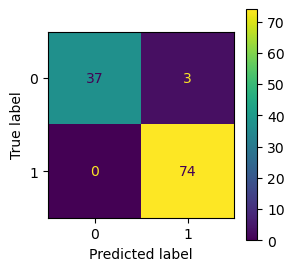

In [ ]:
cm = confusion_matrix(Y_test, predicted)
print('Confusion Matrix:\n', cm)

cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(3,3))
cmp.plot(ax=ax)

**Comment:** The accuracy of 97% signifies that the model correctly predicts the outcomes for a vast majority of instances. The precision score of 0.96 indicates a high level of accuracy in identifying positive instances (74/74), with only a small fraction of false positives (3). Moreover, the perfect recall score of 1.00 reflects the ability of the model to capture all actual positive instances without missing any. The F1 score of 0.98, being a harmonized measure of precision and recall, emphasizes a balanced performance considering both false positives(3) and false negatives(0). Overall, these metrics collectively suggest that the final model exhibits robust and accurate predictions, making it well-suited for the given medical task.

*Save model for later use:*

In [ ]:
# Save the trained model to a file using pickle
with open('.models/breast_cancer_model.pkl','wb') as f:
    pickle.dump(model,f)

# Load a previously saved model from a file using pickle
# with open('.models/breast_cancer_model.pkl', 'rb') as f:
#     model = pickle.load(f)